# Code session 8

In [3]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

A integração numérica em uma variável pode ser realizada em Python utilizando a função `quad` do módulo `scipy.integrate`.

## `quad`

Esta função calcula a integral definida $\int_a^b f(x) \, dx$ numericamente através de regras de quadratura.

Os argumentos de entrada obrigatórios desta função são: 

1. a função `f` a ser integrada
2. o limite inferior `a`
3. o limite superior `b`

Os principais argumentos de saída são:

- `y`: valor numérico da integral
- `abserr`: estimativa do erro absoluto

Como importá-la? 

```python 
from scipy.integrate import quad
```

In [4]:
from scipy.integrate import quad

### Problema 1

O período de um pêndulo simples de comprimento $L$ é $\tau = 4\sqrt{ \dfrac{L}{g} } h(\theta_0)$, onde $g$ é a aceleração gravitacional, $\theta_0$ representa a amplitude angular, e 

$$h(\theta_0) = \int_0^{\pi/2} \dfrac{1}{ \sqrt{ 1 - \textrm{sen}^2(\theta_0/2)\textrm{sen}^2 \theta } } \, d\theta$$

Calcule $h(\tau)$, para $\tau = 15^{\circ}, \, 30^{\circ}, \, 45^{\circ}$ e compare estes valores com $h(0^{\circ}) = \pi/2$ (a aproximação usada para pequenas amplitudes).

#### Resolução

Em primeiro lugar, fazemos os cálculos diretos da integral para os distintos valores de $\tau$.

In [11]:
# cálculo direto das integrais caso a caso

theta0 = np.array([0,15,30,45]) # ângulos

vals,errs = [],[] # integrais, erros

for t in theta0:
    f = lambda theta: 1/(np.sqrt(1. - np.sin(t/2)**2 * np.sin(theta)**2))
    v,e = quad(f,0,np.pi/2)
    print(f'Integral h({t}) = {v:g}')
    vals.append(v)
    errs.append(e)

# converte listas para arrays
vals = np.asarray(vals)
errs = np.asarray(errs)

Integral h(0) = 1.5708
Integral h(15) = 2.49203
Integral h(30) = 1.79372
Integral h(45) = 1.67896


Vemos que o valor das integrais é muito sensível. Para realizar uma comparação mais interessante, utilizaremos um cálculo relativo tomando o valor em $h(0)$ como referência.

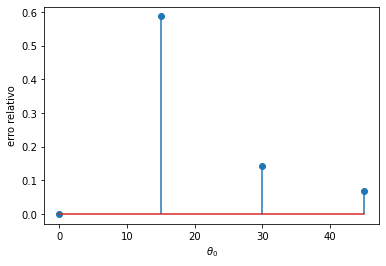

In [20]:
plt.stem(theta0, (vals - vals[0])/vals[0], use_line_collection=True);
plt.xlabel('$\\theta_0$')
plt.ylabel('erro relativo');

Podemos verificar que a mudança de valor da integral entre $15^{\circ}$ e $30^{\circ}$ é da ordem de 60%, enquanto que nos demais casos, ela se limita a 20%.

### Problema 2

Uma corrente elétrica alternada é descrita por 

$$i(t) = i_0 \left( \textrm{sen}\left( \frac{\pi t}{t_0} \right) - \beta \, \textrm{sen}\left( \frac{2 \pi t}{t_0} \right)  \right),$$

onde $i_0 = 1 \, A$, $t_0 = 0.05 \, s$ e $\beta =0.2$. Calcule a corrente RMS definida por 

$$i_{rms} = \sqrt{ \dfrac{1}{t_0} \int_0^{t_0} i^2(t) \, dt}$$

#### Resolução

Neste caso, basta passarmos os valores iniciais e finais para computar a integral. 

In [21]:
i0, t0, beta = 1.0, 0.05, 0.2 # parâmetros iniciais

i2 = lambda t: ( i0 * ( np.sin( (np.pi*t) / t0 ) - beta * np.sin( (2*np.pi*t) / t0 ) ) )**2 # função

i_rms = np.sqrt( 1.0/t0 * quad(i2, 0, t0)[0] )

print(f'Corrente RMS = {i_rms:g} A')

Corrente RMS = 0.72111 A


## Regra do Trapézio Generalizada

A regra do trapézio generalizada (composta) pode ser calculada usando 

```python
scipy.integrate.cumtrapz
```

Vamos utilizar a função $i(t)$ do Problema 2 e estimar sua integral no intervalo $t = [0,5]$ utilizando a regra do trapézio generalizada.

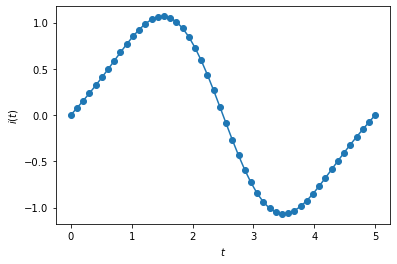

In [28]:
# Visualização
t = np.linspace(0,5)
i = lambda t: i0 * ( np.sin( (np.pi*t) / t0 ) - beta * np.sin( (2*np.pi*t) / t0 ) )  # função

plt.plot(t,i(t),'o-');
plt.xlabel('$t$')
plt.ylabel('$i(t)$');

In [38]:
from scipy.integrate import cumtrapz

i = lambda t: i0 * ( np.sin( (np.pi*t) / t0 ) - beta * np.sin( (2*np.pi*t) / t0 ) ) # função

T = cumtrapz(i(t), t)[-1] # pega último valor, já que é cumulativa

print(f'Integral por Trapézio = {T:g}')

Integral por Trapézio = -4.97605e-15


## Quadratura Gaussiana (QG)

O cálculo de uma integral por quadratura Gaussiana pode ser calculado usando 

```python
scipy.integrate.quadrature
```

Vamos utilizar a função $i(t)$ do Problema 2 e estimar sua integral no intervalo $t = [0,5]$ utilizando a QG para várias ordens (controladas pelo argumento `miniter`). 

In [8]:
from scipy.integrate import quadrature

for ordem in range(1,11):
    I_QG,err_QG = quadrature(i,0,5,miniter=ordem)
    print(f'Integral por QG (ordem {ordem}) = {I_QG:g}')

Integral por QG (ordem 1) = 3.60822e-14
Integral por QG (ordem 2) = 9.71445e-15
Integral por QG (ordem 3) = 4.35416e-14
Integral por QG (ordem 4) = 6.92502e-14
Integral por QG (ordem 5) = 6.58501e-14
Integral por QG (ordem 6) = -5.7801e-14
Integral por QG (ordem 7) = -1.39472e-14
Integral por QG (ordem 8) = -1.60288e-14
Integral por QG (ordem 9) = -5.89806e-16
Integral por QG (ordem 10) = -4.02976e-14
